# Assignment 2


## Advanced ML 

## PGCP DSML IITR-TimesPro


### Submitted by - Sylvia Chadha


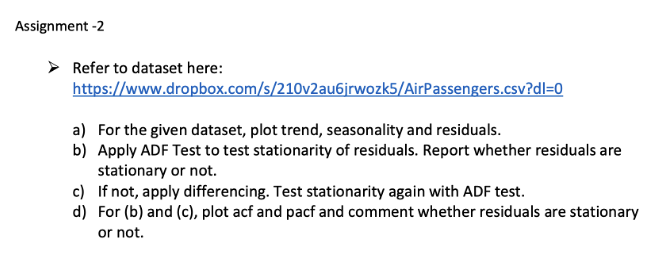

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

**Load the Dataset**

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [4]:
df.shape

(144, 2)

There are 144 rows and 2 columns for Month and Number of Passengers.

The data is from `01-1949` to `12-1960` and the frequency is monthly.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


**Data Type**

To change datatype for Month which is detected as an object & set as index.

In [6]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m') 

In [7]:
ts = df.set_index('Month')

In [8]:
ts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# <font color=blue>1a. Plot Trend, Seasonality and residuals

In [9]:
from statsmodels.tsa import seasonal

In [10]:
decompose_ts = seasonal.seasonal_decompose(ts, period=12, model='additive') 
decompose_ts

Below plot we can see the Trend, Seasonality and Residual component of Airline time series.

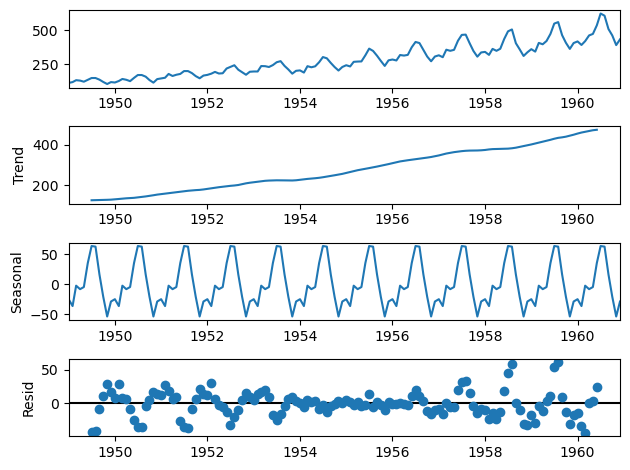

In [11]:
decompose_ts.plot();


We can also check the values of each of components of time series i.e. Trend, Seasonality and Residuals.

In [12]:
print('Trends:',decompose_ts.trend[:10])
print('\n')
print('Seasons:',decompose_ts.seasonal[:10])
print('\n')
print('Residuals:', decompose_ts.resid[:10])

Trends: Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: trend, dtype: float64


Seasons: Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
1949-06-01    35.402778
1949-07-01    63.830808
1949-08-01    62.823232
1949-09-01    16.520202
1949-10-01   -20.642677
Name: seasonal, dtype: float64


Residuals: Month
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
Name: resid, dtype: float64


# <font color=blue>1b. ADF Test to test Stationarity of residuals.

**We do the ADF (Augmented Dickey–Fuller test) to check the stationarity of residuals.**

- H0 : Signal is not stationary
- H1 : Signal is stationary

In [13]:
from statsmodels.tsa.stattools import adfuller


In [14]:
decompose_ts.resid.values[0:15]

array([         nan,          nan,          nan,          nan,
                nan,          nan, -42.62247475, -42.07323232,
        -8.47853535,  11.05934343,  28.59343434,  16.86994949,
         8.49873737,  29.10479798,   8.32449495])

In [15]:
result = adfuller(decompose_ts.resid.dropna())     # for residuals only
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -5.298427587050728
p-value: 5.516868902226411e-06
Critial Values:
   1%, -3.4870216863700767
Critial Values:
   5%, -2.8863625166643136
Critial Values:
   10%, -2.580009026141913


- The p-value is compared to the significance level (alpha), which is 0.05. 
- Since p-value is almost 0 and hence less than alpha 0.05 so we reject the null hypothesis H0 thereby concluding that the residual component is stationary.

**ADF Test shows that the residuals are Stationary.**

# <font color=blue>1c. If residuals not stationary, apply differencing. Test Stationarity with ADF Test.

As we already got residuals as stationary with ADF test, so we need not require to apply differencing.

# <font color=blue>1d. For (b) and (c) plt acf and pacf and comment whether residuals are stationary or not ?

**ACF Plot**

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


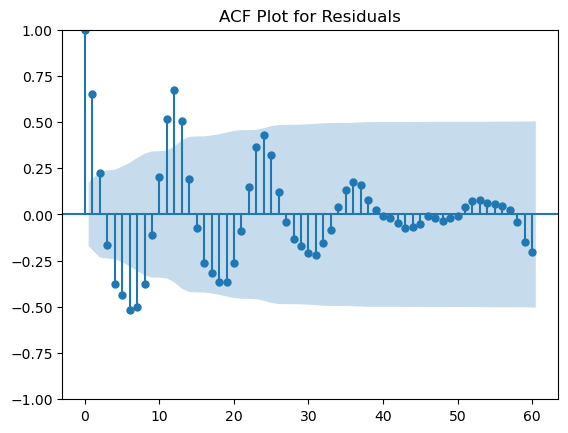

In [17]:
plot_acf((decompose_ts.resid).dropna(), lags=60)
plt.title('ACF Plot for Residuals');


Although residuals are stationary as per ADF test however as seen from ACF plot it has some statistically significant correlations (which lie above and below the blue shaded area).

**PACF Plot**

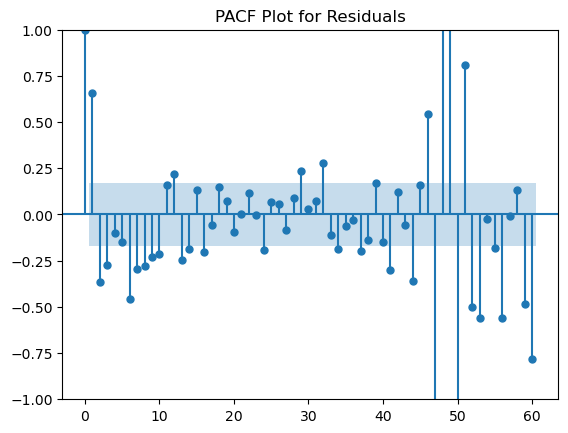

In [19]:
plot_pacf((decompose_ts.resid).dropna(), lags=60)
plt.title('PACF Plot for Residuals');